In [47]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Huizhe ZHU\Desktop\Folklore project\folklore_lyrics.csv', encoding = "ISO-8859-1")    
df.head(10)  


,song,lyrics
0,the 1,"I'm doing good, I'm on some new shit"
1,the 1,"Been saying ""Yes"" instead of ""No"""
2,the 1,"I thought I saw you at the bus stop, I didn't ..."
3,the 1,I hit the ground running each night
4,the 1,I hit the Sunday matinee
5,the 1,You know the greatest films of all time were n...
6,the 1,"I guess you never know, never know"
7,the 1,"And if you wanted me, you really should've showed"
8,the 1,"And if you never bleed, you're never gonna grow"
9,the 1,And it's alright now


Clean data: To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:
1. lower the text
2. tokenize the text (split the text into words) and remove the punctuation
3. remove useless words that contain numbers
4. remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
5. Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
6. lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [48]:
# download stop words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["lyrics_clean"] = df["lyrics"].apply(lambda x: clean_text(x))
df.head(5)

[nltk_data] Downloading package stopwords to C:\Users\Huizhe
[nltk_data]     ZHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Huizhe
[nltk_data]     ZHU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Huizhe ZHU\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,song,lyrics,lyrics_clean
0,the 1,"I'm doing good, I'm on some new shit",i'm good i'm new shit
1,the 1,"Been saying ""Yes"" instead of ""No""",say yes instead
2,the 1,"I thought I saw you at the bus stop, I didn't ...",think saw bus stop though
3,the 1,I hit the ground running each night,hit ground run night
4,the 1,I hit the Sunday matinee,hit sunday matinee


# add sentiment anaylsis columns
Add sentiment analysis features by Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It  takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:
- a neutrality score
- a positivity score
- a negativity score
- an overall score that summarizes the previous scores

In [49]:
#feature engineering
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['sentiments'] = df['lyrics'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

df.head(5)

[nltk_data] Downloading package vader_lexicon to C:\Users\Huizhe
[nltk_data]     ZHU\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,song,lyrics,lyrics_clean,neg,neu,pos,compound
0,the 1,"I'm doing good, I'm on some new shit",i'm good i'm new shit,0.288,0.480,0.232,-0.1779
1,the 1,"Been saying ""Yes"" instead of ""No""",say yes instead,0.000,1.000,0.000,0.0000
2,the 1,"I thought I saw you at the bus stop, I didn't ...",think saw bus stop though,0.216,0.784,0.000,-0.2960
3,the 1,I hit the ground running each night,hit ground run night,0.000,1.000,0.000,0.0000
4,the 1,I hit the Sunday matinee,hit sunday matinee,0.000,1.000,0.000,0.0000


The following shows list of songs sorted by positive sentiment:

In [95]:
# group neg, neu, pos by the song names
neg = pd.DataFrame(df.groupby("song")["neg"].mean())
neu = pd.DataFrame(df.groupby("song")["neu"].mean())
pos = pd.DataFrame(df.groupby("song")["pos"].mean())

result = neg.merge(neu, on = 'song').merge(pos, on = 'song')
#result = neg.append(neu['neu'])
result.sort_values(by=['pos'],ascending=False)

,neg,neu,pos
song,,,
seven,0.067049,0.744463,0.188488
the last great american dynasty,0.102725,0.722025,0.175250
cardigan,0.042679,0.822000,0.135321
my tears ricochet,0.141698,0.723774,0.134528
the 1,0.050761,0.823522,0.125717
betty,0.072413,0.813587,0.114000
mad woman,0.196039,0.698471,0.105490
invisible string,0.047659,0.859341,0.092977
august,0.035444,0.874097,0.090458


# add number of characters and words

In [50]:
# add number of characters column
df["nb_chars"] = df["lyrics"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["lyrics"].apply(lambda x: len(x.split(" ")))
df.head(5)

,song,lyrics,lyrics_clean,neg,neu,pos,compound,nb_chars,nb_words
0,the 1,"I'm doing good, I'm on some new shit",i'm good i'm new shit,0.288,0.480,0.232,-0.1779,36,8
1,the 1,"Been saying ""Yes"" instead of ""No""",say yes instead,0.000,1.000,0.000,0.0000,33,6
2,the 1,"I thought I saw you at the bus stop, I didn't ...",think saw bus stop though,0.216,0.784,0.000,-0.2960,52,12
3,the 1,I hit the ground running each night,hit ground run night,0.000,1.000,0.000,0.0000,35,7
4,the 1,I hit the Sunday matinee,hit sunday matinee,0.000,1.000,0.000,0.0000,24,5


# Topic modeling by Gensim
Extracting vector representations for every review. 

The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using *shallow neural networks*. What’s interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [51]:
# create doc2vec vector columns

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["lyrics_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["lyrics_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

# TF-IDF
Add the TF-IDF (Term Frequency — Inverse Document Frequency) values for every word and every document.

A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:
- TF computes the classic number of times the word appears in the text
- IDF computes the relative importance of this word which depends on how many texts the word can be found

We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [52]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10)

tfidf_result = tfidf.fit_transform(df["lyrics_clean"]).toarray()

tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]

tfidf_df.index = df.index

df = pd.concat([df, tfidf_df], axis=1)
df.head(5)

,song,lyrics,lyrics_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_still,word_tell,word_thing,word_think,word_time,word_try,word_ve,word_want,word_woman,word_would
0,the 1,"I'm doing good, I'm on some new shit",i'm good i'm new shit,0.288,0.480,0.232,-0.1779,36,8,-0.056718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,the 1,"Been saying ""Yes"" instead of ""No""",say yes instead,0.000,1.000,0.000,0.0000,33,6,0.081833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,the 1,"I thought I saw you at the bus stop, I didn't ...",think saw bus stop though,0.216,0.784,0.000,-0.2960,52,12,-0.057498,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,the 1,I hit the ground running each night,hit ground run night,0.000,1.000,0.000,0.0000,35,7,0.062743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,the 1,I hit the Sunday matinee,hit sunday matinee,0.000,1.000,0.000,0.0000,24,5,0.085448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory data analysis

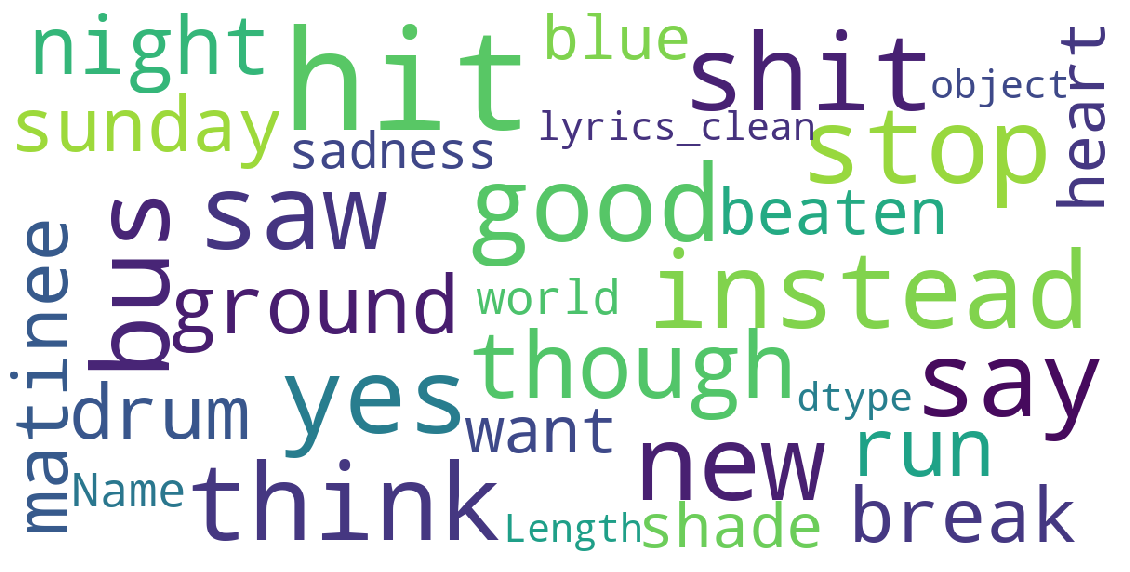

In [66]:
# print wordclouds to have a glimpse at what kind of words apear in our reviews:
# wordcloud function
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 50, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["lyrics_clean"])

Most of the words are indeed related to _______________________. Some words are related to _____________

In [70]:
# show positive lyrics 
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["song","lyrics", "pos"]].head(10)


,song,lyrics,pos
133,the last great american dynasty,I had a marvelous time,0.661
138,the last great american dynasty,I had a marvelous time,0.661
57,cardigan,"Baby kiss it better, right",0.655
213,my tears ricochet,I swear I loved you,0.639
712,peace,It's like I'm wastin' your honor,0.588
60,cardigan,A friend to all is a friend to none,0.561
682,betty,"Yeah, I showed up at your party",0.551
681,betty,"Yeah, I showed up at your party",0.551
12,the 1,And if my wishes came true,0.524
28,the 1,And if my wishes came true,0.524


In [69]:
# show negative lyrics 
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["song","lyrics", "neg"]].head(10)

,song,lyrics,neg
571,mad woman,What a shame she went mad,0.677
553,mad woman,What a shame she went mad,0.677
589,mad woman,What a shame she went mad,0.677
251,my tears ricochet,You turned into your worst fears,0.633
433,this is me trying,And my words shoot to kill when I'm mad,0.632
160,exile,Those eyes add insult to injury,0.604
700,peace,"No, I could never give you peace",0.558
54,cardigan,"Drunk under a streetlight, I",0.545
554,mad woman,No one likes a mad woman,0.529
572,mad woman,No one likes a mad woman,0.529
